Procedure:
*  Import Dataset
*  EDA:Check for datatypes, Missing & duplicate values, Check for outliers, 
Correlation analysis
*   Model building with multiple linear regression 
*   Model Validation: Check for multi collinearity,normality of error, residual analysis through error plots
*   Model deletion diagnostics: Removing outliers


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
import statsmodels.formula.api as sm

In [3]:
#import dataset
data=pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


**EDA**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df=data.rename({"R&D Spend":'RnD',"Marketing Spend":'marketing'},axis=1)

df.head()

,RnD,Administration,marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: >

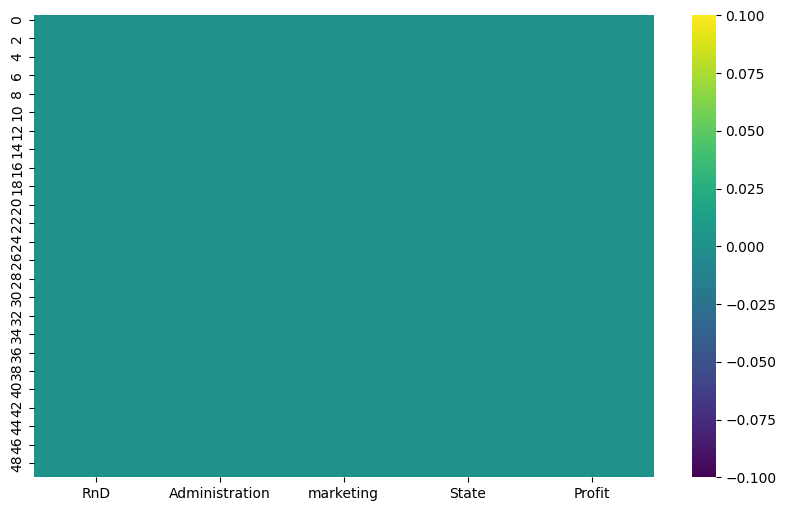

In [6]:
#Checking for missing values using heatmaps
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap='viridis')


No missing values found

In [7]:
#Correlation Analysis
df.corr()

<ipython-input-7-79a0a3b66469>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,RnD,Administration,marketing,Profit
RnD,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


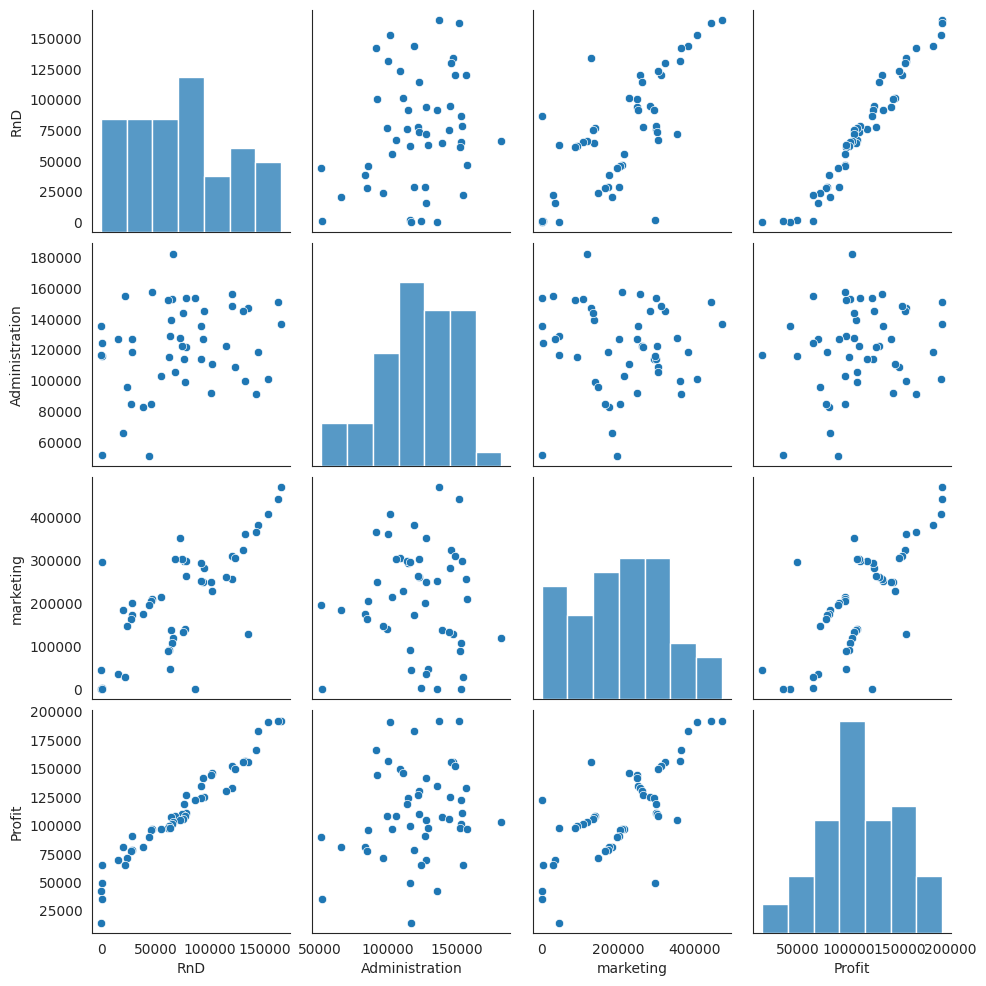

In [33]:
sns.set_style(style='white')
sns.pairplot(df)

**Model building**

Assumptions: 

*   Linear relation should exist b/w target and independent variables
*   All the variables should be independent to each other
*   No multicollinearity
*   No hetroscadasticity
*   Normally distrubuted errors

In [9]:
model = sm.ols("Profit~RnD+Administration+marketing", data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 26 May 2023   Prob (F-statistic):           4.53e-30
Time:                        10:41:29   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD                0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observe t and P values for dependent variable and noticed that RnD have significant t and P values as its Pvalue<0.05

 Build SLR and MLR models with the different combination of features for Adminstartion and marketing

In [11]:
Admin_model=sm.ols("Profit~Administration",data=df).fit()
Admin_model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 26 May 2023   Prob (F-statistic):              0.162
Time:                        10:41:29   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Administration has in-significant pvalue

In [12]:
marketing_model=sm.ols("Profit~marketing",data=df).fit()
marketing_model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 26 May 2023   Prob (F-statistic):           4.38e-10
Time:                        10:41:29   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
marketing      0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

marketing has significant pvalue

In [13]:
multi_model=sm.ols("Profit~Administration+marketing",data=df).fit()
multi_model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Fri, 26 May 2023   Prob (F-statistic):           2.50e-10
Time:                        10:41:29   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration     0.3237      0.131      2.468      0.017       0.060       0.588
marketing          0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Model Validation** :
**1. Collinearity Check 2. Check for hetroscadasticity 3.Residual analysis**

In [14]:
#1 Collinearity Check with VIF: drop the variables having VIF>20
#VIF = 1/(1-R^2)

rsq_r=sm.ols("RnD~Administration+marketing",data=df).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=sm.ols("Administration~RnD+marketing",data=df).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=sm.ols("marketing~Administration+RnD",data=df).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RnD','Administration','marketing'],'VIF':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,VIF
0,RnD,2.468903
1,Administration,1.175091
2,marketing,2.326773


No VIF>20, hence there is No Collinearity

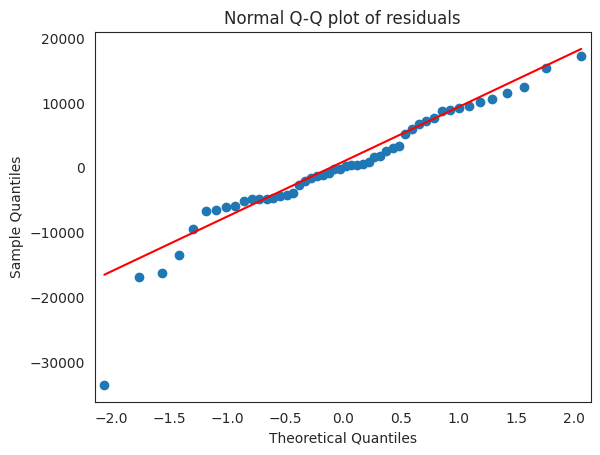

In [35]:
#Check for normality in the features

smf.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [36]:
list(np.where(model.resid<-30000))

[array([49])]

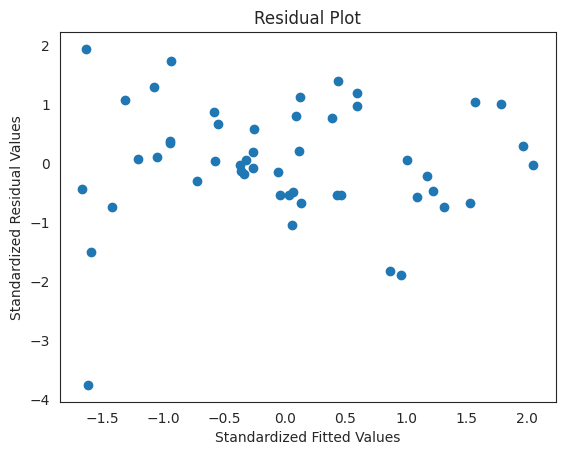

In [37]:
#2 check for hetroscadasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

eval_env: 1


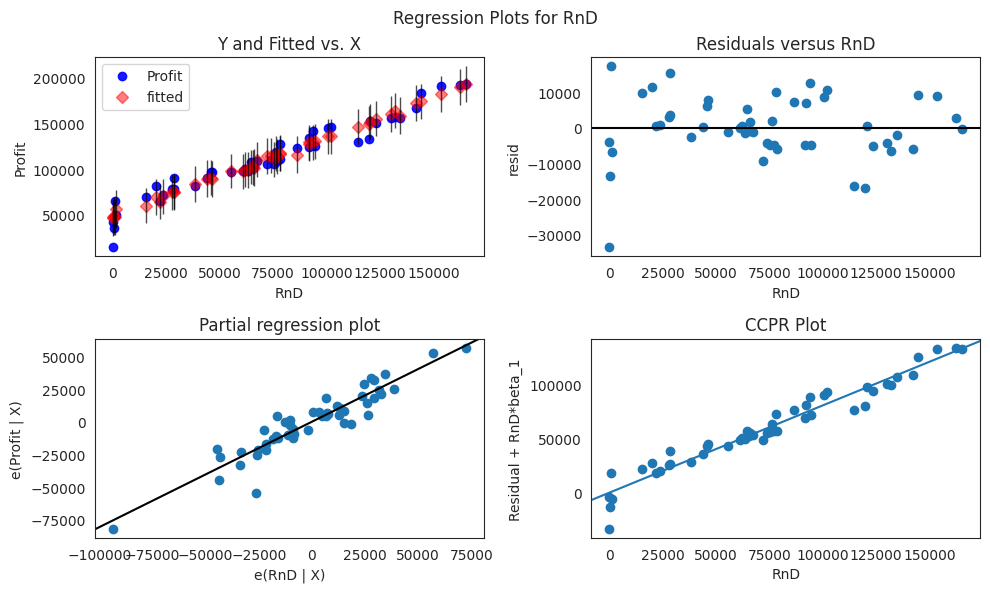

In [39]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable
fig=plt.figure(figsize=(10,6))
smf.graphics.plot_regress_exog(model,'RnD',fig=fig)
plt.show()

eval_env: 1


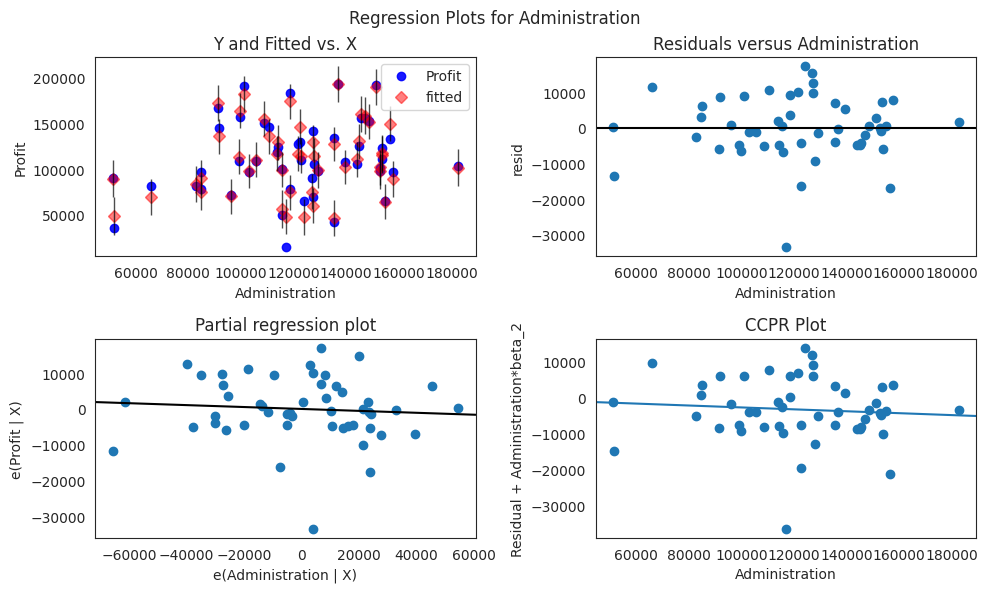

In [40]:
fig=plt.figure(figsize=(10,6))
smf.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

eval_env: 1


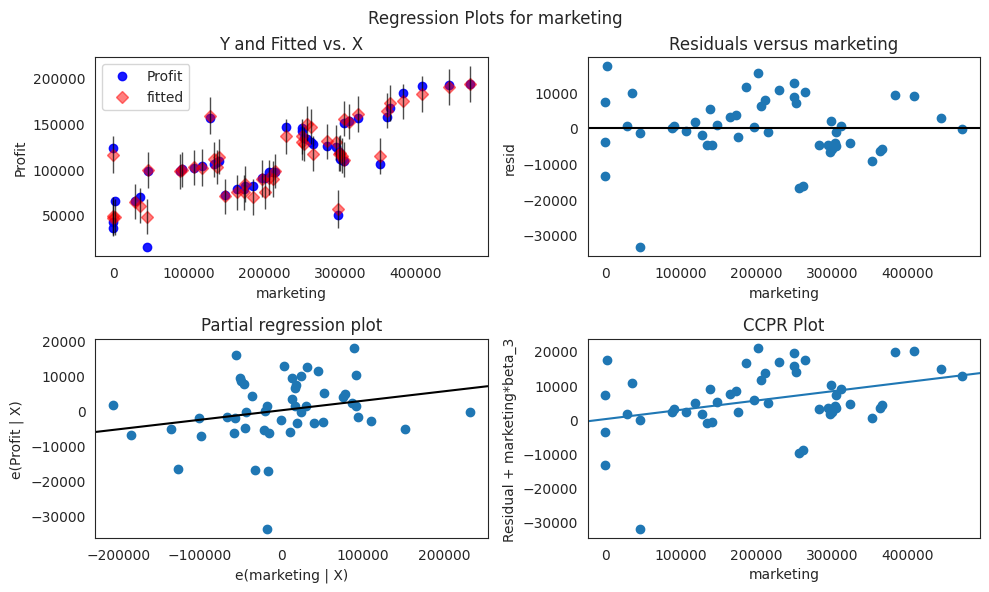

In [41]:
fig=plt.figure(figsize=(10,6))
smf.graphics.plot_regress_exog(model,'marketing',fig=fig)
plt.show()

**Model Deletion Diagnostics**

In [42]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance

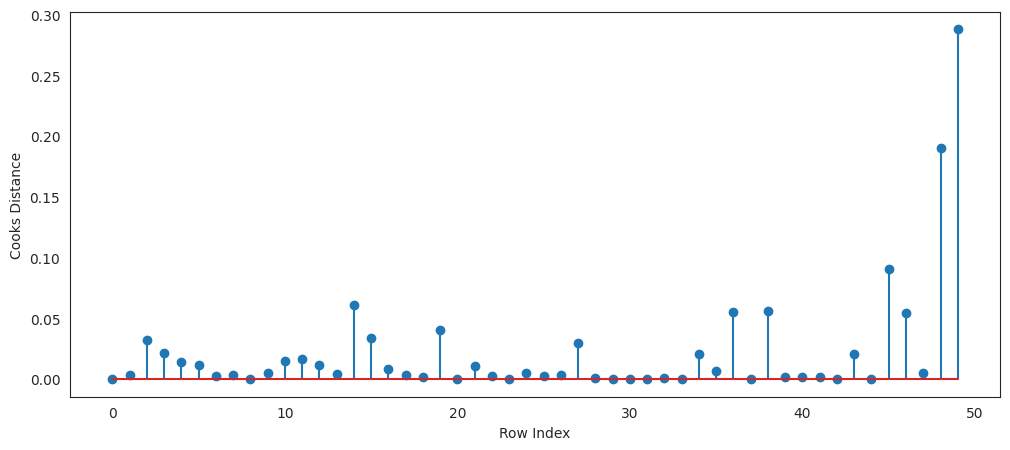

In [43]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(12,5))
plt.stem(np.arange(len(df)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [21]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.5620610259264286)

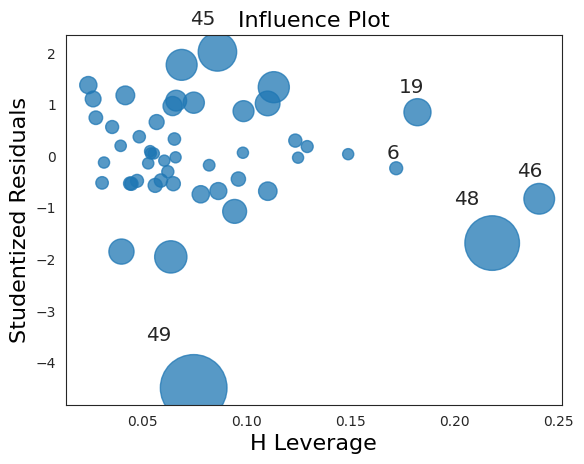

In [44]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [45]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=df.shape[1]
n=df.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In the above stem plot the row index 49 is an outlier because its magnitude > leverage cutoff= 0.36

In [46]:
# The outlier is
df[df.index.isin([49])] 

,RnD,Administration,marketing,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [47]:
#Improve the model
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
df2=df.drop(df.index[[49]],axis=0).reset_index(drop=True)

The model is improved by deleting the outlier/influencer

In [52]:
# Final model
while np.max(c)>0.5 :
    model=sm.ols("Profit~RnD+Administration+marketing",data=df2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df2=df2.drop(df2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df2
else:
    final_model=sm.ols("Profit~RnD+Administration+marketing",data=df2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [49]:
model.rsquared


0.9507459940683246

In [53]:
final_model.rsquared

0.9613162435129847

We can observe the improvement in R-squared value from Rnd_model to final_model

In [29]:
df2.head()

,RnD,Administration,marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [30]:
data2=df2.iloc[:,0]
pred_y=final_model.predict(data2)

In [55]:
predicted = pd.DataFrame()
predicted['RnD'] = df.RnD
predicted['Actual_Profit'] = df.Profit
predicted['Pred_Profit']=final_model.predict(df2)
predicted['Pred_Profit_R']=model.predict(df2)
#Find error without any tranformation
predicted['Error_FinalModel']=predicted['Actual_Profit'] - predicted['Pred_Profit']
predicted['Error_RndModel']=predicted['Actual_Profit'] - predicted['Pred_Profit_R']

predicted=predicted.dropna()

In [57]:
from sklearn.metrics import mean_squared_error
Initial_Model__rmse =np.sqrt(mean_squared_error(predicted['Actual_Profit'], predicted['Pred_Profit_R']))
FinalModel__rmse =np.sqrt(mean_squared_error(predicted['Actual_Profit'], predicted['Pred_Profit']))

print(Initial_Model__rmse,'\n',FinalModel__rmse)

7554.354032419177 
 7430.589093678352


RnDModel__rmse: Root mean square error before improving the model , FinalModel__rmse: Root mean square error after improving the model.
Finally,
It is observed that the RMSE is reduced before and after improving the model